In [13]:
import cv2
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from skimage.feature import hog
from skimage.transform import resize
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import skimage.io as io
from commonfunctions import *
import pandas as pd

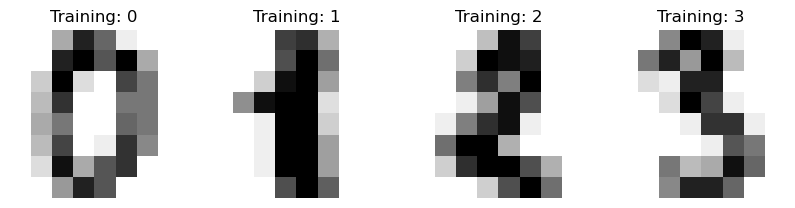

In [15]:
digits = datasets.load_digits()

digitsHead = pd.read_csv('train.csv') 


_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [17]:
digitsHead.head()
digitsHead.shape

(42000, 785)

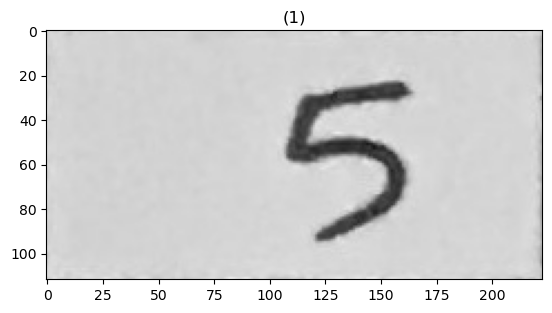

(112, 223)


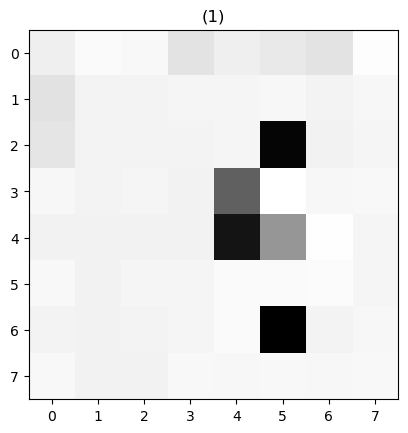

[1]


In [11]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)
img = cv2.imread('./images/88.jpg')
show_images([img])
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)
img = cv2.resize(img, (8,8), interpolation = cv2.INTER_NEAREST)

show_images([img])


# Predict the value of the digit on the test subset
predicted = clf.predict(img.reshape(1,-1))
print(predicted)

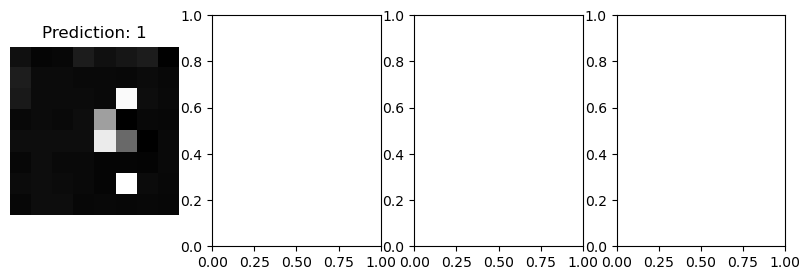

In [12]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, img.reshape(1,-1), predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")